In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before anything we add a name for each column to make them meaningful and easy to use.

In [51]:
data = pd.read_csv('train_data.csv')
data

,Sentence,Emotion
0,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
1,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
2,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
3,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
4,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
...,...,...
4919,من از بو و ماندگاریش راضی بودم ، قیمتش هم‌ مناسبه,HAPPY
4920,گاز نداریم آب نداریم برق نداریم نت نداریم پول ...,SAD
4921,یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...,SAD
4922,زیادی داریم به قضیه ی گاز میپردازیم فقط فراخوا...,OTHER


In [52]:
data.shape

(4924, 2)

In [53]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

<AxesSubplot: >

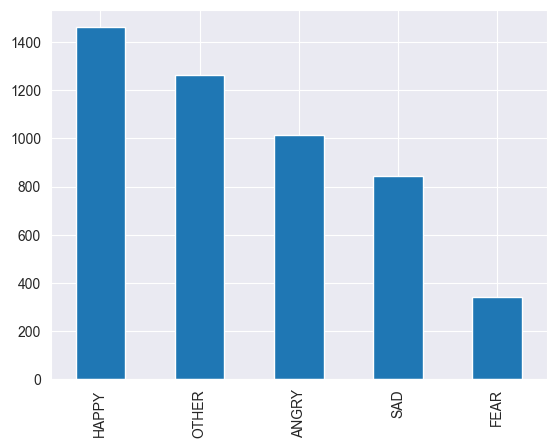

In [54]:
plot_df = data.Emotion.value_counts()
plot_df.plot(kind="bar")

In [55]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'ى', '3', '²', 'م', 'k', 'I', '”', '\u2067', 'A', '۵', 'ر', 'ك', 'ي', '٠', '☝', '⭕', 'ً', '☠', 'G', 'g', 'S', '۳', 'j', 'M', '✅', 'ث', 'ژ', '«', 'ټ', '/', 'u', '%', '٦', '\u2066', 'ئ', 'x', '0', 'ق', '٬', '⛓', 'ش', 'ے', 'K', ' ', '☹', '☄', 'C', '•', 'ن', 'ص', '=', ',', ';', 'َ', 'ʏ', '\u2069', '١', '\u200d', '‘', '8', '⚘', '“', 'z', 'ᴛ', '۴', '✋', '؛', 'T', '✍', 'خ', 'س', 'ل', '\u200c', ':', '✨', 'ّ', 'ت', '\n', 'V', 'أ', 'ہ', ')', 'F', '*', '۹', '☘', 'D', '؟', 'ز', 't', 'h', '&', '⃟', '۶', '‐', '♀', 'H', 'ِ', 'y', 'ە', 'R', 'v', '-', '۔', 'ۀ', '[', '_', 'غ', 'e', 'ی', '۲', '⁉', 'ھ', '☺', 'l', 'ک', 'U', '٪', 'ذ', '️', '،', '٣', 'O', '✌', 'ؤ', '7', 'د', '¹', 'Y', 'm', 'ج', '❄', 'Q', '٫', 'ٔ', '⊰', 'o', '5', 'ظ', '۷', 'ع', 'J', '♥', 'ɴ', '+', 'L', '6', 'آ', 'b', 'W', 'پ', 'ح', 'a', 'r', 'd', '’', '?', 'چ', 'ب', '}', '۱', '4', 'ض', 'و', 'ـ', 'c', '(', '❤', '۰', '|', 'ْ', 'ُ', 'ط', 's', '٢', 'P', '♂', '»', '…', 'E', '1', 'w', '⭐', '⚽', 'N', 'n', 'p', 'گ', '~', 'ه', '2', '!', 'ف', 'ء',

As we can see there are capital and small letter. Also, there are three kind of 'ی' for only one char and there are persian and english numbers. We have to handle all of them.

In [56]:
data['Sentence'] = data['Sentence'].str.lower()
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

185
{'ى', '3', '²', 'م', 'k', '”', '\u2067', '۵', 'ر', 'ك', 'ي', '٠', '☝', '⭕', 'ً', '☠', 'g', '۳', 'j', '✅', 'ث', 'ژ', '«', 'ټ', '/', 'u', '%', '٦', '\u2066', 'ئ', 'x', '0', 'ق', '٬', '⛓', 'ش', 'ے', ' ', '☹', '☄', '•', 'ن', 'ص', '=', ',', ';', 'َ', 'ʏ', '\u2069', '١', '\u200d', '‘', '8', '⚘', '“', 'z', 'ᴛ', '۴', '✋', '؛', '✍', 'خ', 'س', 'ل', '\u200c', ':', '✨', 'ّ', 'ت', '\n', 'أ', 'ہ', ')', '*', '۹', '☘', '؟', 'ز', 't', 'h', '&', '⃟', '۶', '‐', '♀', 'ە', 'ِ', 'y', 'v', '-', '۔', 'ۀ', '[', '_', 'غ', 'e', 'ی', '۲', '⁉', 'ھ', '☺', 'l', 'ک', '٪', 'ذ', '️', '،', '٣', '✌', 'ؤ', '7', 'د', '¹', 'm', 'ج', '❄', '٫', 'ٔ', '⊰', 'o', '5', 'ظ', '۷', 'ع', '♥', 'ɴ', '+', '6', 'آ', 'b', 'پ', 'ح', 'a', 'r', 'd', '’', '?', 'چ', 'ب', '}', '۱', '4', 'ض', 'و', 'ـ', 'c', '(', '❤', '۰', '|', 'ْ', 'ُ', 'ط', 's', '٢', '♂', '»', '…', '1', 'w', '⭐', '⚽', 'n', 'p', 'گ', '~', 'ه', '2', '!', 'ف', 'ء', 'ا', '#', 'f', 'i', ']', '°', '۸', '^', 'ة', 'q', 'ᴏ', '.', '9', 'ᴇ'}


In [57]:
def convert_persian_to_english(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

# Apply the function to the 'text' column
data['Sentence'] = data['Sentence'].apply(convert_persian_to_english)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

174
{'ى', '3', '²', 'م', 'k', '”', '\u2067', 'ر', 'ك', 'ي', '٠', '☝', '⭕', 'ً', '☠', 'g', 'j', '✅', 'ث', 'ژ', '«', 'ټ', '/', 'u', '%', '\u2066', 'ئ', 'x', '0', 'ق', '٬', '⛓', 'ش', 'ے', ' ', '☹', '☄', '•', 'ن', 'ص', '=', ',', ';', 'َ', 'ʏ', '\u2069', '١', '\u200d', '‘', '8', '⚘', '“', 'z', 'ᴛ', '✋', '؛', '✍', 'خ', 'س', 'ل', '\u200c', ':', '✨', 'ّ', 'ت', '\n', 'أ', 'ہ', ')', '*', '☘', '؟', 'ز', 't', 'h', '&', '⃟', '‐', '♀', 'ە', 'ِ', 'y', 'v', '-', '۔', 'ۀ', '[', '_', 'غ', 'e', 'ی', '⁉', 'ھ', '☺', 'l', 'ک', '٪', 'ذ', '️', '،', '٣', '✌', 'ؤ', '7', 'د', '¹', 'm', 'ج', '❄', '٫', 'ٔ', '⊰', 'o', '5', 'ظ', 'ع', '♥', 'ɴ', '+', '6', 'آ', 'b', 'پ', 'ح', 'a', 'r', 'd', '’', '?', 'چ', 'ب', '}', '4', 'ض', 'و', 'ـ', 'c', '(', '❤', '|', 'ْ', 'ُ', 'ط', 's', '٢', '♂', '»', '…', '1', 'w', '⭐', '⚽', 'n', 'p', 'گ', '~', 'ه', '2', '!', 'ف', 'ء', 'ا', '#', 'f', 'i', ']', '°', '^', 'ة', 'q', 'ᴏ', '.', '9', 'ᴇ'}


Now we handle the numbers and upper cases.

In [58]:
def normalize_yeh(text):
    # The three types of "ی" in Persian: ی, ي, ے, ئ
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']
    # Convert all types of "ی" to the standard "ی"
    for char in yeh_characters:
        text = text.replace(char, 'ی')
    return text

# Apply the normalization function to the 'text' column
data['Sentence'] = data['Sentence'].apply(normalize_yeh)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

170
{'3', '²', 'م', 'k', '”', '\u2067', 'ر', 'ك', '٠', '☝', '⭕', 'ً', '☠', 'g', 'j', '✅', 'ث', 'ژ', '«', 'ټ', '/', 'u', '%', '\u2066', 'x', '0', 'ق', '٬', '⛓', 'ش', ' ', '☹', '☄', '•', 'ن', 'ص', '=', ',', ';', 'َ', 'ʏ', '\u2069', '١', '\u200d', '‘', '8', '⚘', '“', 'z', 'ᴛ', '✋', '؛', '✍', 'خ', 'س', 'ل', '\u200c', ':', '✨', 'ّ', 'ت', '\n', 'أ', 'ہ', ')', '*', '☘', '؟', 'ز', 't', 'h', '&', '⃟', '‐', '♀', 'ە', 'ِ', 'y', 'v', '-', '۔', 'ۀ', '[', '_', 'غ', 'e', 'ی', '⁉', 'ھ', '☺', 'l', 'ک', '٪', 'ذ', '️', '،', '٣', '✌', 'ؤ', '7', 'د', '¹', 'm', 'ج', '❄', '٫', 'ٔ', '⊰', 'o', '5', 'ظ', 'ع', '♥', 'ɴ', '+', '6', 'آ', 'b', 'پ', 'ح', 'a', 'r', 'd', '’', '?', 'چ', 'ب', '}', '4', 'ض', 'و', 'ـ', 'c', '(', '❤', '|', 'ْ', 'ُ', 'ط', 's', '٢', '♂', '»', '…', '1', 'w', '⭐', '⚽', 'n', 'p', 'گ', '~', 'ه', '2', '!', 'ف', 'ء', 'ا', '#', 'f', 'i', ']', '°', '^', 'ة', 'q', 'ᴏ', '.', '9', 'ᴇ'}


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.61
F1-score: 0.61


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.58
F1-score: 0.57


In [6]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.62
F1-score: 0.62


In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = KNeighborsClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.55
F1-score: 0.54


In [8]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import re

# Load your dataset
df = pd.read_csv('train_data.csv')

# Preprocess the text data
def preprocess_text(text):
    # Normalize Persian characters
    text = normalize_persian(text)

    # Convert to lowercase
    text = text.lower()

    # Add more preprocessing steps as needed

    return text

def normalize_persian(text):
    # Define a function to normalize Persian characters
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    yeh_characters = ['ی', 'ي', 'ے', 'ئ']

    text = text.translate(str.maketrans(persian_digits, english_digits))
    for char in yeh_characters:
        text = text.replace(char, 'ی')

    return text

# Preprocess the text data
df['Sentence'] = df['Sentence'].apply(preprocess_text)
encoder = OrdinalEncoder()
# Fit and transform the 'emotion' column
df['emotion'] = encoder.fit_transform(df[['Emotion']])
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['emotion'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = XGBClassifier()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.59
F1-score: 0.60
